In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

In [25]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [27]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [29]:
models = {
    "ResNet18": models.resnet18(num_classes=10),
    "MobileNet": models.mobilenet_v2(num_classes=10),
    "ShuffleNet": models.shufflenet_v2_x1_0(num_classes=10)
}

In [31]:
def train_and_validate(model, train_loader, val_loader, optimizer, criterion, num_epochs=25):
    training_loss, val_loss = [], []
    training_accuracy, val_accuracy = [], []
    
    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        correct, total = 0, 0
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # Metrics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_acc = correct / total
        training_accuracy.append(train_acc)
        training_loss.append(running_loss / len(train_loader))
        
        # Validation Phase
        model.eval()
        correct, total = 0, 0
        running_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_acc = correct / total
        val_accuracy.append(val_acc)
        val_loss.append(running_loss / len(val_loader))
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')
    
    return training_loss, val_loss, training_accuracy, val_accuracy


Training ResNet18...
Epoch [1/25], Train Acc: 0.4149, Val Acc: 0.4862
Epoch [2/25], Train Acc: 0.5528, Val Acc: 0.5930
Epoch [3/25], Train Acc: 0.6146, Val Acc: 0.5904
Epoch [4/25], Train Acc: 0.6570, Val Acc: 0.6577
Epoch [5/25], Train Acc: 0.6798, Val Acc: 0.6442
Epoch [6/25], Train Acc: 0.7082, Val Acc: 0.6970
Epoch [7/25], Train Acc: 0.7280, Val Acc: 0.6793
Epoch [8/25], Train Acc: 0.7389, Val Acc: 0.7233
Epoch [9/25], Train Acc: 0.7538, Val Acc: 0.7270
Epoch [10/25], Train Acc: 0.7632, Val Acc: 0.7306
Epoch [11/25], Train Acc: 0.7715, Val Acc: 0.7475
Epoch [12/25], Train Acc: 0.7851, Val Acc: 0.7624
Epoch [13/25], Train Acc: 0.7914, Val Acc: 0.7583
Epoch [14/25], Train Acc: 0.8001, Val Acc: 0.7588
Epoch [15/25], Train Acc: 0.8036, Val Acc: 0.7678
Epoch [16/25], Train Acc: 0.8112, Val Acc: 0.7711
Epoch [17/25], Train Acc: 0.8198, Val Acc: 0.7858
Epoch [18/25], Train Acc: 0.8248, Val Acc: 0.7740
Epoch [19/25], Train Acc: 0.8267, Val Acc: 0.7797
Epoch [20/25], Train Acc: 0.8303, Val

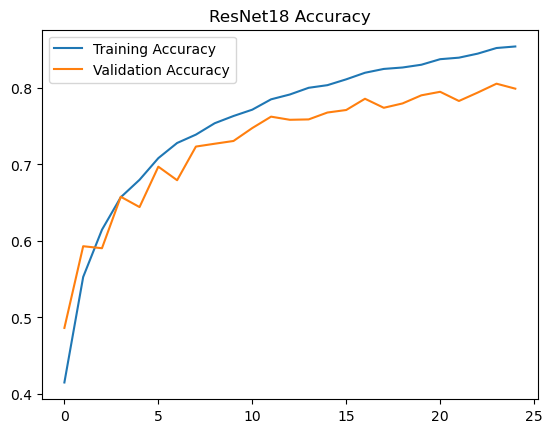

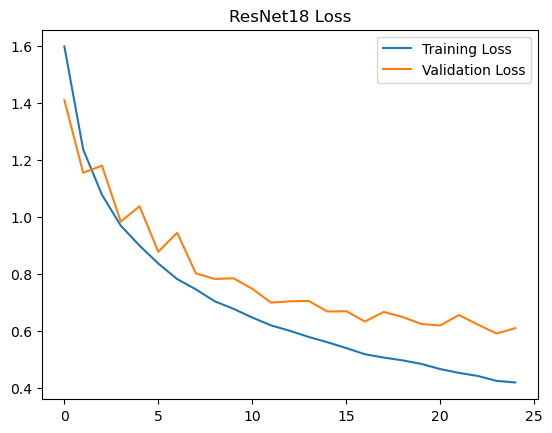

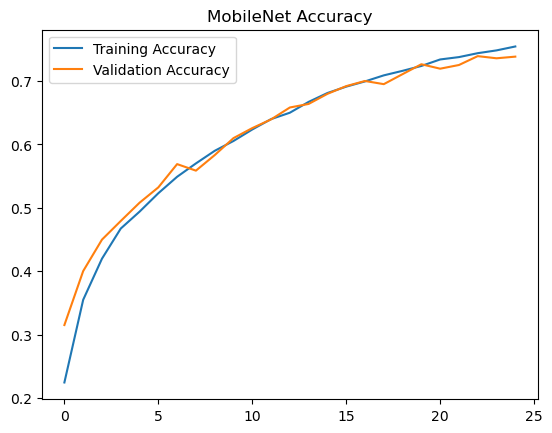

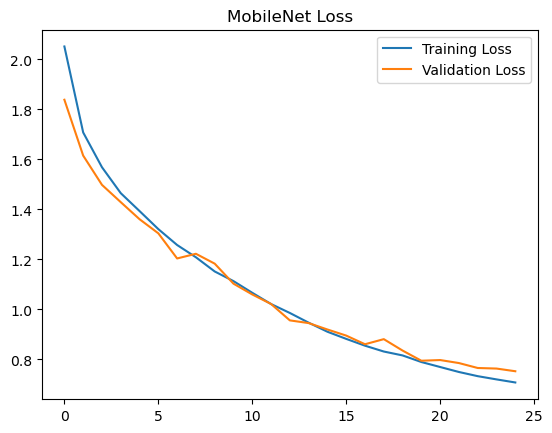

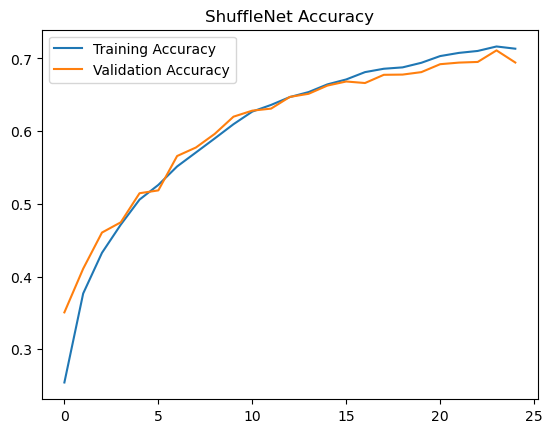

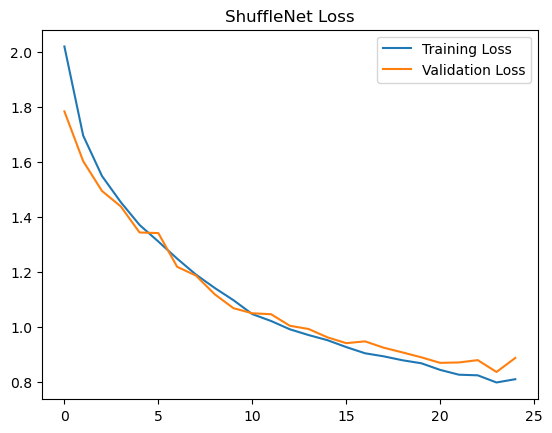

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()

for name, model in models.items():
    print(f"\nTraining {name}...")
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_loss, val_loss, train_acc, val_acc = train_and_validate(model, train_loader, val_loader, optimizer, criterion)
    
    # Plotting curves
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title(f'{name} Accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'{name} Loss')
    plt.legend()

In [33]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_accuracy = correct/total
print(f"{name} Test Accuracy: {test_accuracy:.4f}")

NameError: name 'model' is not defined

In [41]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
test_accuracy = correct / total

test_accuracies[name] = test_accuracy  # Store test accuracy for each model
print(f"{name} Test Accuracy: {test_accuracy:.4f}")

# Print out the test accuracies of all models
print("\nFinal Test Accuracies for all models:")
for name, accuracy in test_accuracies.items():
    print(f"{name}: {accuracy:.4f}")

NameError: name 'test_accuracies' is not defined

In [43]:
# Initialize the dictionary before the loop
test_accuracies = {}

# Evaluate the model and store test accuracy
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
test_accuracies[name] = test_accuracy  # Store test accuracy for each model
print(f"{name} Test Accuracy: {test_accuracy:.4f}")

# Print out the test accuracies of all models
print("\nFinal Test Accuracies for all models:")
for name, accuracy in test_accuracies.items():
    print(f"{name}: {accuracy:.4f}")


ShuffleNet Test Accuracy: 0.6858

Final Test Accuracies for all models:
ShuffleNet: 0.6858


In [51]:
2+2

4